PARTIAMO DAI DATI MEDIA CLOUD

### CONFRONTO DATI ISTAT CON DATI DI MEDIA CLOUD
Lo scopo del seguente
progetto è indagare se ci sono correlazioni tra i dati dei Reati Denunciati alle Forze dell'Ordine pubblicati dall'ISTAT e l'attenzione mediatica riguardo alla criminalità in Italia. 
I dati sono disponibili ai seguenti: 
https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,Z0840JUS,1.0/JUS_CRIMINAL/DCCV_DELITTIPS/IT1,73_67_DF_DCCV_DELITTIPS_1,1.0
https://search.mediacloud.org/search

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dati da MediaCloud (disponibili dal 2020 ad oggi)

In [33]:
#carico il file dei dati di MediaCloud
df_mc = pd.read_csv("C:\\Users\\39392\\Downloads\\mc-onlinenews-mediacloud-20250212164633-counts.csv", sep=',') 
print("Dati Media Cloud:")
print(df_mc.head())

Dati Media Cloud:
         date  count  total_count     ratio
0  2020-01-01    340         3044  0.111695
1  2020-01-02    511         5041  0.101369
2  2020-01-03    582         5033  0.115637
3  2020-01-04    509         3745  0.135915
4  2020-01-05    501         3458  0.144881


C:\Users\39392\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\39392\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


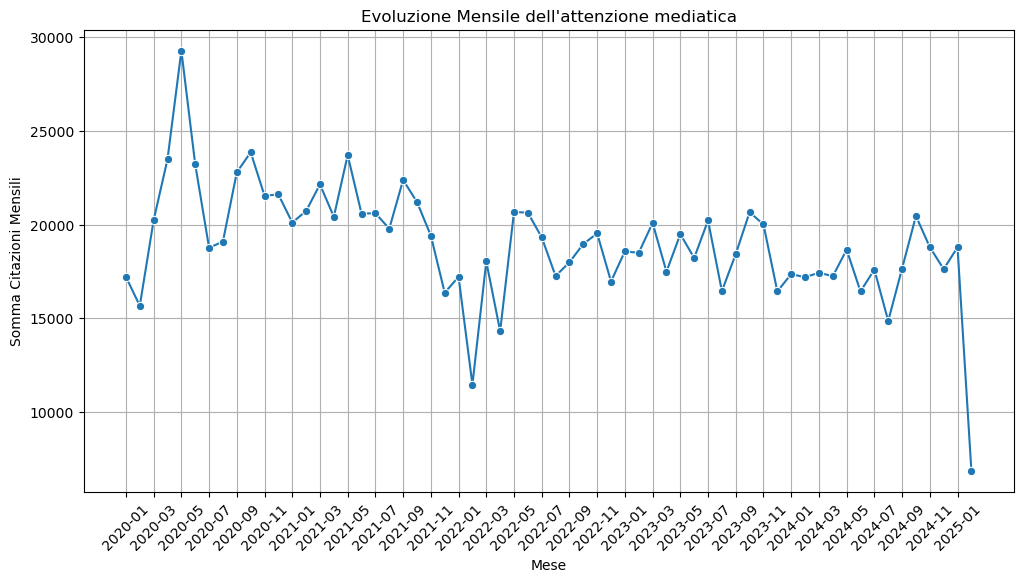

In [34]:
#aggrego il dataset mensilmente
df_mc['date'] = pd.to_datetime(df_mc['date'], errors='coerce')

df_mc['month'] = df_mc['date'].dt.to_period('M')  #estraggo anno e mese
monthly_mc = df_mc.groupby('month')['count'].sum().reset_index()
monthly_mc['month'] = monthly_mc['month'].astype(str)  #converto in stringa per plottare

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_mc, x='month', y='count', marker='o', linestyle='-')
plt.xlabel('Mese')
plt.ylabel('Somma Citazioni Mensili')
plt.title('Evoluzione Mensile dell\'attenzione mediatica')
ticks = np.arange(0, len(monthly_mc), step=2)
plt.xticks(ticks, monthly_mc['month'].iloc[ticks], rotation=45)
plt.grid(True)
plt.show()

In [35]:
#aggrego il dataset annualmente 
df_mc['date'] = pd.to_datetime(df_mc['date'], errors='coerce') 
df_mc['year'] = df_mc['date'].dt.year  

annual_mc = df_mc.groupby('year')['count'].sum().reset_index()
annual_mc.rename(columns={'count': 'MC_attention'}, inplace=True) #la rinomino 


C:\Users\39392\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\39392\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


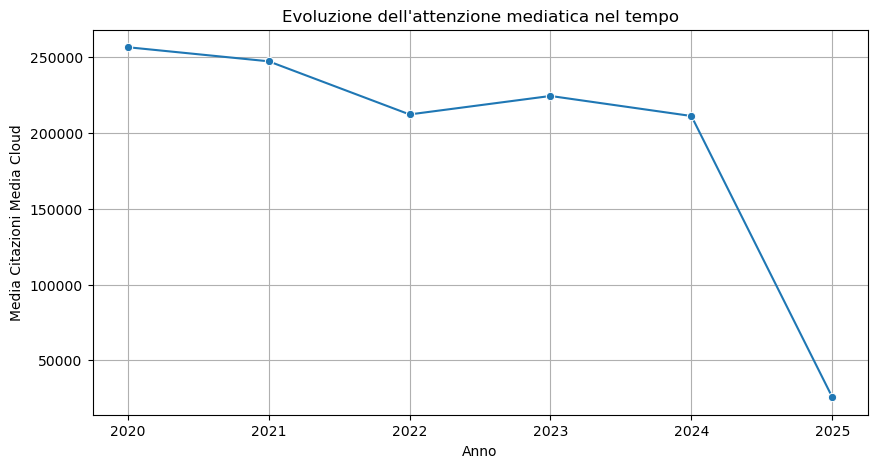

In [36]:
# Plot 
plt.figure(figsize=(10,5))
sns.lineplot(data=annual_mc, x='year', y='MC_attention', marker='o', linestyle='-')
plt.xlabel('Anno')
plt.ylabel('Media Citazioni Media Cloud')
plt.title('Evoluzione dell\'attenzione mediatica nel tempo')
plt.grid(True)
plt.show()

## Dati dall'ISTAT

In [37]:
#Carico il dataset dell'ISTAT
file_path = r"C:\Users\39392\Downloads\Tipo di reato - prov (IT1,73_67_DF_DCCV_DELITTIPS_1,1.0) (1).xlsx"
df_istat = pd.read_excel(file_path, skiprows=6)
print(df_istat.head(10))
print(df_istat.columns)

         Tempo     2014     2015     2016     2017     2018     2019    \
0   Territorio                                                           
1       Italia    2812936  2687249  2487389  2429795  2371806  2301912   
2   Nord-ovest     867743   822433   767062   737571   713713   691367   
3     Piemonte     240892   227047   207885   193783   184594   180478   
4       Torino     157674   149233   136384   128186   120643   116454   
5     Vercelli       6698     6555     5643     5166     5063     4701   
6       Novara      17417    15060    13522    12774    12663    12946   
7        Cuneo      17746    17138    16467    14986    14992    14849   
8         Asti       9456     8880     8756     7666     7595     7254   
9  Alessandria      19258    18069    16739    15327    14643    14875   

    2020     2021     2022     2023    
0                                      
1  1900624  2104114  2255777  2341574  
2   544793   634060   682650   715305  
3   147640   169903   173

C:\Users\39392\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [38]:
#Seleziono solo la riga 'Italia'
df_istat_totale = df_istat[df_istat.iloc[:, 0].str.contains("Italia", case=False, na=False)]
print(df_istat_totale)

    Tempo     2014     2015     2016     2017     2018     2019     2020    \
1  Italia    2812936  2687249  2487389  2429795  2371806  2301912  1900624   

    2021     2022     2023    
1  2104114  2255777  2341574  


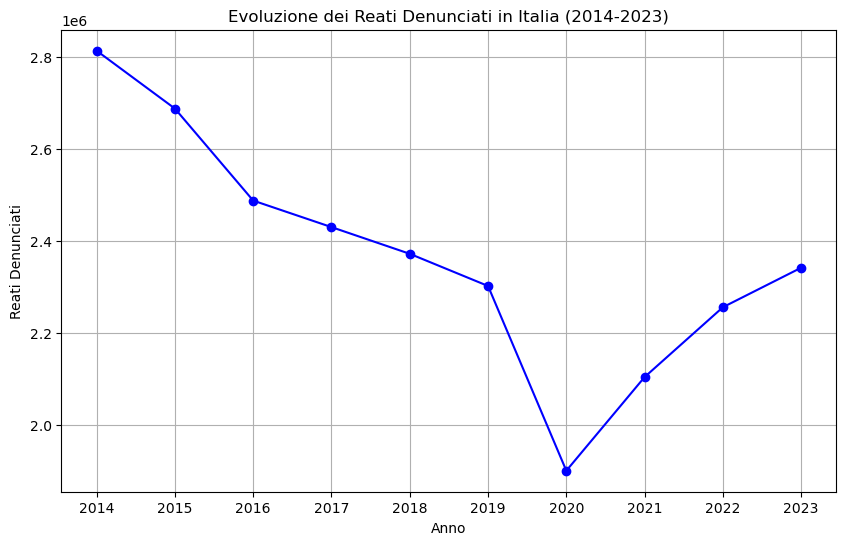

In [39]:
#Traspongo il DataFrame per ottenere un formato long (anno vs reati denunciati)
df_long = df_istat_totale.drop(columns=['Tempo  ']).transpose()  # Rimuoviamo la colonna 'Tempo' e trasponiamo
df_long.columns = ['Reati Denunciati']  # Impostiamo il nome della colonna
df_long['year'] = df_long.index  #aggiungo la colonna anno

df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
df_long['Reati Denunciati'] = pd.to_numeric(df_long['Reati Denunciati'], errors='coerce')

plt.figure(figsize=(10,6))
plt.plot(df_long['year'], df_long['Reati Denunciati'], marker='o', linestyle='-', color='b')
plt.xlabel('Anno')
plt.ylabel('Reati Denunciati')
plt.title('Evoluzione dei Reati Denunciati in Italia (2014-2023)')
plt.grid(True)
plt.xticks(df_long['year'])  
plt.show()


## Confronto tra i due dataset

In [40]:
# Selezioniamo solo gli anni in comune 2020-2023
anni_da_confrontare = [2020, 2021, 2022, 2023]

annual_mc = annual_mc[annual_mc['year'].isin(anni_da_confrontare)]
df_istat_long = df_long[df_long['year'].isin(anni_da_confrontare)]


In [41]:
df_confronto = pd.merge(annual_mc, df_istat_long, on='year', how='inner')
print(df_confronto)  # Controlliamo che il merge sia corretto


   year  MC_attention  Reati Denunciati
0  2020        256694           1900624
1  2021        247397           2104114
2  2022        212322           2255777
3  2023        224519           2341574


<Figure size 1000x600 with 0 Axes>

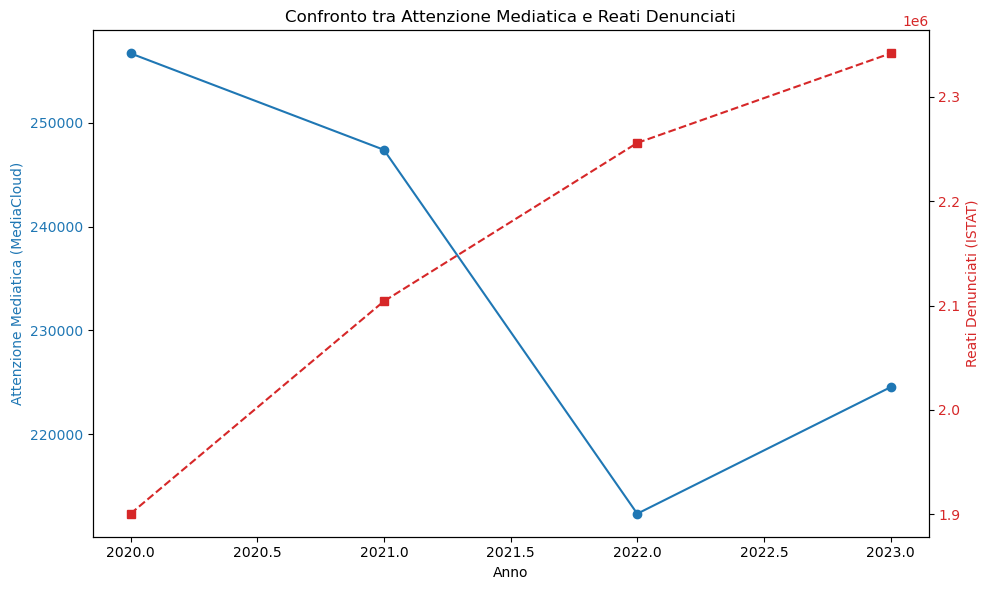

In [42]:
plt.figure(figsize=(10,6))

# Creiamo un asse con due scale
fig, ax1 = plt.subplots(figsize=(10,6))

# Primo asse per l'attenzione mediatica
ax1.set_xlabel("Anno")
ax1.set_ylabel("Attenzione Mediatica (MediaCloud)", color="tab:blue")
ax1.plot(df_confronto["year"], df_confronto["MC_attention"], marker="o", linestyle="-", color="tab:blue", label="Attenzione Mediatica")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Secondo asse per il reati denunciati 
ax2 = ax1.twinx()
ax2.set_ylabel("Reati Denunciati (ISTAT)", color="tab:red")
ax2.plot(df_confronto["year"], df_confronto["Reati Denunciati"], marker="s", linestyle="--", color="tab:red", label="Reati Denunciati")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Confronto tra Attenzione Mediatica e Reati Denunciati")
fig.tight_layout()
plt.show()


C:\Users\39392\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\39392\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\39392\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\39392\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

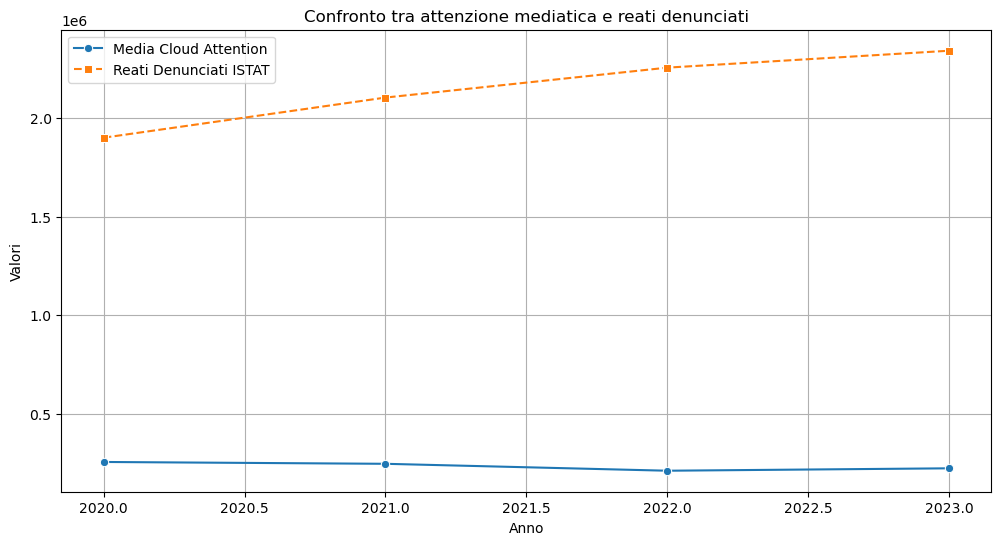

In [43]:
#Plot con un solo asse 
plt.figure(figsize=(12,6))

sns.lineplot(data=df_confronto, x='year', y='MC_attention', marker='o', linestyle='-', label='Media Cloud Attention')
sns.lineplot(data=df_confronto, x='year', y='Reati Denunciati', marker='s', linestyle='--', label='Reati Denunciati ISTAT')
plt.xlabel('Anno')
plt.ylabel('Valori')
plt.title('Confronto tra attenzione mediatica e reati denunciati')
plt.legend()
plt.grid(True)
plt.show()


## Confronto tra i due dataset restringendo la ricerca sulla regione Piemonte

In [44]:
#Pulisco le colonne dai caratteri (come gli spazi)
df_istat.columns = df_istat.columns.str.strip()
df_istat['Tempo'] = df_istat['Tempo'].str.strip().str.lower()

#Seleziono la riga relativa al Piemonte
df_istat_piemonte = df_istat[df_istat['Tempo'] == 'piemonte']
print(df_istat_piemonte)

#Rimuovo la colonna Tempo e la metto in formato lungo 
df_istat_long_piemonte = df_istat_piemonte.melt(id_vars=['Tempo'], var_name='year', value_name='Reati_Denunciati')
df_istat_long_piemonte = df_istat_long_piemonte.drop(columns=['Tempo'])

df_istat_long_piemonte['year'] = pd.to_numeric(df_istat_long_piemonte['year'], errors='coerce')
df_istat_long_piemonte['Reati_Denunciati'] = pd.to_numeric(df_istat_long_piemonte['Reati_Denunciati'], errors='coerce')
print(df_istat_long_piemonte.isna().sum())
print(df_istat_long_piemonte.head())

      Tempo    2014    2015    2016    2017    2018    2019    2020    2021  \
3  piemonte  240892  227047  207885  193783  184594  180478  147640  169903   

     2022    2023  
3  173425  187398  
year                0
Reati_Denunciati    0
dtype: int64
   year  Reati_Denunciati
0  2014            240892
1  2015            227047
2  2016            207885
3  2017            193783
4  2018            184594


In [45]:
#Carico il file dei dati di MediaCloud
df_mc = pd.read_csv("C:\\Users\\39392\\Downloads\\mc-onlinenews-mediacloud-20250212224738-counts.csv", sep=',') 
print("Dati Media Cloud:")
print(df_mc.head())

Dati Media Cloud:
         date  count  total_count     ratio
0  2020-01-01     68          434  0.156682
1  2020-01-02    124          947  0.130940
2  2020-01-03    137          964  0.142116
3  2020-01-04    132          859  0.153667
4  2020-01-05    135          800  0.168750


In [46]:
#ora aggreghiamo i dati affinchè diventino annuali
df_mc['date'] = pd.to_datetime(df_mc['date'], errors='coerce')
df_mc['year'] = df_mc['date'].dt.year

annual_mc_piemonte = df_mc.groupby('year')['count'].sum().reset_index()
annual_mc_piemonte.rename(columns={'count': 'MC_attention'}, inplace=True)

print("Dati Media Cloud Aggregati Annualmente:")
print(annual_mc)

Dati Media Cloud Aggregati Annualmente:
   year  MC_attention
0  2020        256694
1  2021        247397
2  2022        212322
3  2023        224519


In [47]:
# Unisci i due dataset sul campo "year"
df_confronto_piemonte = pd.merge(annual_mc_piemonte, df_istat_long_piemonte, on='year', how='inner')
print(df_confronto_piemonte)


   year  MC_attention  Reati_Denunciati
0  2020         59519            147640
1  2021         60423            169903
2  2022         29445            173425
3  2023         20390            187398


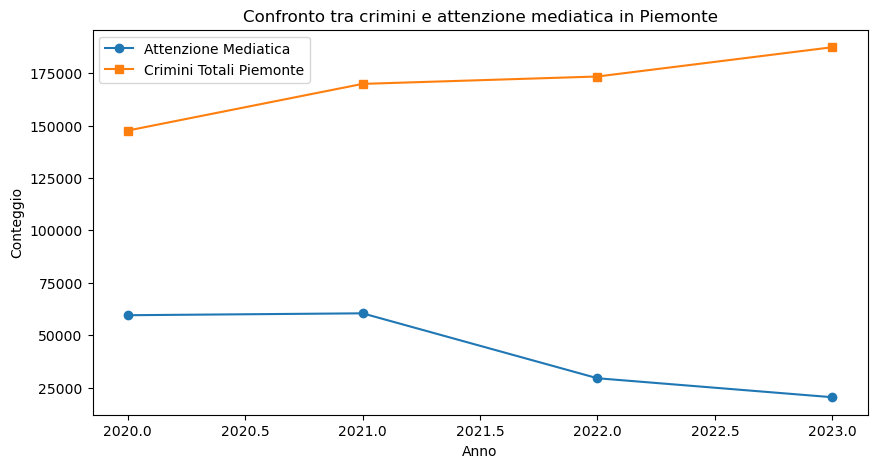

In [48]:
#E li plotto
plt.figure(figsize=(10, 5))
plt.plot(df_confronto_piemonte["year"], df_confronto_piemonte["MC_attention"], label="Attenzione Mediatica", marker="o")
plt.plot(df_confronto_piemonte["year"], df_confronto_piemonte["Reati_Denunciati"], label="Crimini Totali Piemonte", marker="s")
plt.xlabel("Anno")
plt.ylabel("Conteggio")
plt.legend()
plt.title("Confronto tra crimini e attenzione mediatica in Piemonte")
plt.show()


<Figure size 1000x600 with 0 Axes>

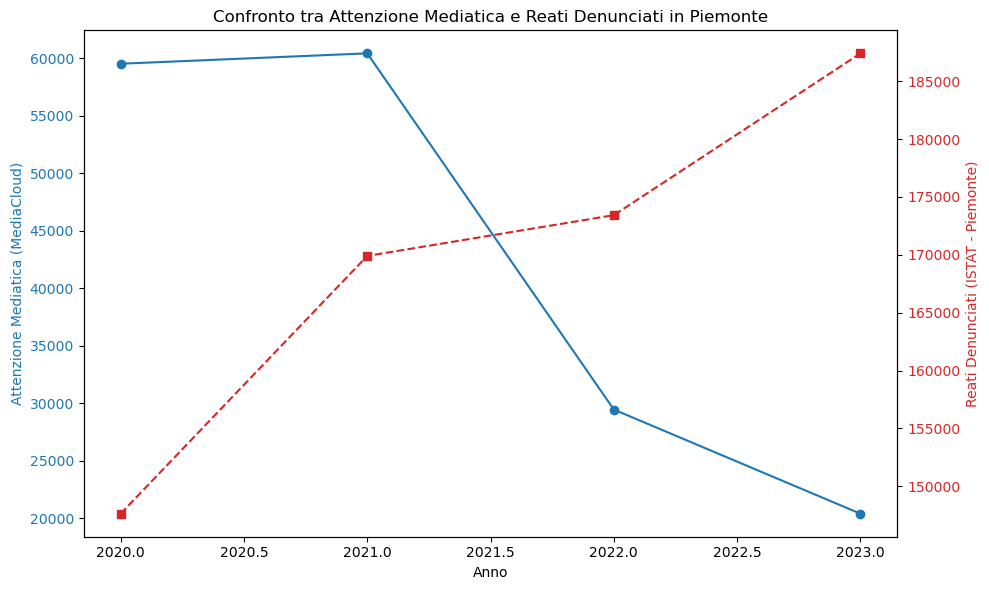

In [49]:
# lo plotto con due scale diverse, come nel caso precedente
plt.figure(figsize=(10,6))
fig, ax1 = plt.subplots(figsize=(10,6))

# Primo asse per l'attenzione mediatica
ax1.set_xlabel("Anno")
ax1.set_ylabel("Attenzione Mediatica (MediaCloud)", color="tab:blue")
ax1.plot(df_confronto_piemonte["year"], df_confronto_piemonte["MC_attention"], marker="o", linestyle="-", color="tab:blue", label="Attenzione Mediatica")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Secondo asse per reati denunciati in Piemonte
ax2 = ax1.twinx()
ax2.set_ylabel("Reati Denunciati (ISTAT - Piemonte)", color="tab:red")
ax2.plot(df_confronto_piemonte["year"], df_confronto_piemonte["Reati_Denunciati"], marker="s", linestyle="--", color="tab:red", label="Reati Denunciati")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Confronto tra Attenzione Mediatica e Reati Denunciati in Piemonte")
fig.tight_layout()
plt.show()


## CONSIDERAZIONI SUI RISULTATI:
E' evidente che i risultati non mostrano alcun tipo di correlazione e si manifestano su scale molto diverse.
E' interessante notare che un aumento dei reati non si traduce in un aumento degli articoli che ne parlano.
I dati ISTAT sui reati denunciati riflettono eventi che, pur essendo in aumento, potrebbero non risultare “sensazionali” per i media o non attirare l’attenzione se paragonati ad altri eventi di crisi.
I media, d'altro canto, possono aver cambiare priorità: durante la pandemia e nel periodo post-pandemia, la copertura mediatica si è spostata su temi come la salute, l'economia, la politica e altri argomenti emergenti, a discapito della cronaca criminale.
Il confronto tra i due dataset è anche un po' debilitato dalla limitatezza dell'arco temporate che caratterizza l'overlap tra i dati ISTAT e i dati di MediaCloud: è evidente che 4 anni, di cui due protagonisti della pandemia Covid-19, non sono sufficienti per effettuare un'analisi soddisfacente.